<a href="https://colab.research.google.com/github/KumJungMin/TF_machine_learning/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.  신경망에 대하여
## 1) 신경망이란?
- 인공신경망은 뇌의 뉴런의 동작원리에 기초한, 인간의 신경을 흉내낸 머신러닝 기법이다.

- 인공신경망을 사용하여, 매우 복잡한 패턴을 스스로 학습할 수 있게한다.


```
사람의 뇌에서 일어나는 일을 살펴 봅시다. 
감각 기관에서 받아들인 정보가 뉴런을 통해 뇌로 전달됩니다.
이후 뇌는 종합, 판단해서 다시 명령을 내리게 되죠. 
이 때, 여러 개의 뉴런이 연결되면서 복잡한 연산 등을 수행하게 되는데 
이와 같은 두뇌의 정보 처리 과정을 모방해서 만든 알고리즘이 바로 인공 신경망입니다. 
여러 정보가 입력되면 정해져 있던 함수의 과정을 거쳐 새로운 값을 내놓는 것이지요.

최근에 선보이고 있는 번역 프로그램 중에는 인공 신경망이 적용된 것도 있습니다. 
이전의 번역 프로그램들은 이미 저장되어 있는 해석에 따라 기계적인 번역을 제공했는데, 
이렇게 하면 다소 어색한 부분이 있었습니다. 하지만 인공 신경망 번역 프로그램은 전후 문맥
 상황을 파악하여 가장 적절하게, 흐름에 맞게 번역함으로서 훨씬 자연스럽고 정교한 번역을 
 제공해 주는 것입니다.

[네이버 지식백과] 인공 신경망 [artificial neural network] (천재학습백과 초등 소프트웨어 용어사전)

```





### (1) 인공뉴런과 뉴런




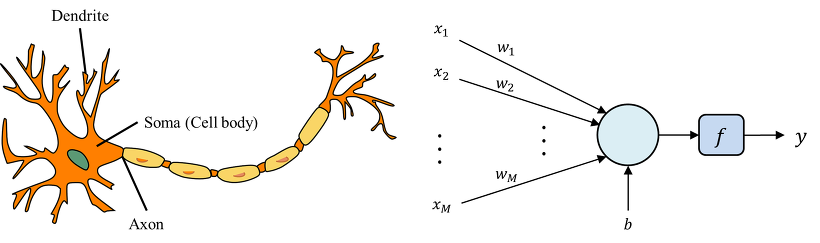


- 뉴런의 기본
```
신호 -> Dendrite(가지돌기) -> 축삭돌기 -> 축삭말단 -> 다음 뉴런으로 전달된다.
```


-  인공뉴런의 기본
```
(입력값X) * (가중치W) + (편향b)  -> 이 값이 활성화함수(f, Sigmod)를 거처 -> 결과값 y 
```


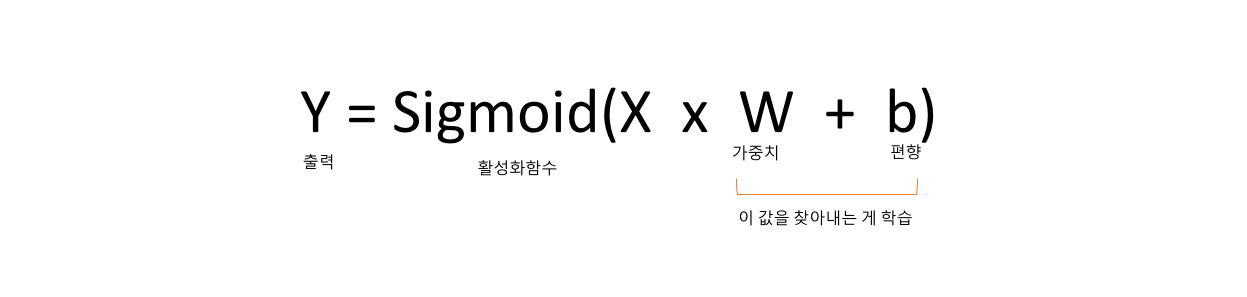

: 인공뉴런은 원하는 y값을 만들어내기 위해 W, b값을 변경하며 적절한 값을 찾아내는 학습을 한다.

<br/>

- 활성화 함수



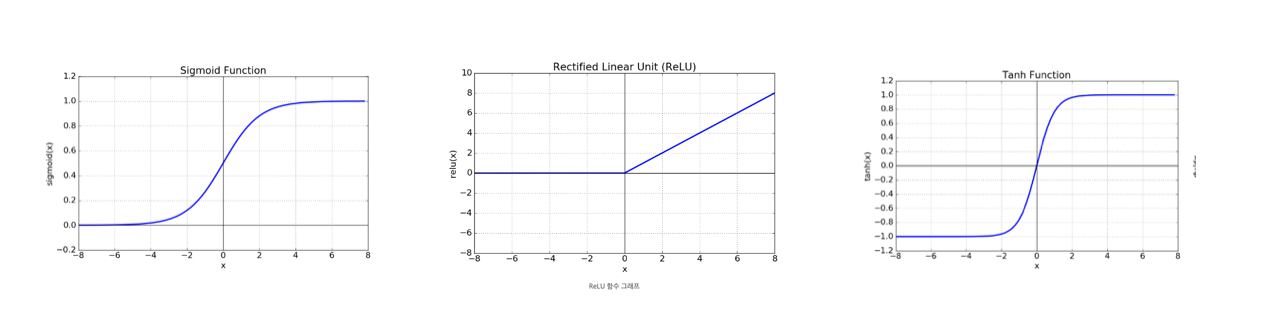


: 인공신경망을 통과한 값을 최종적으로 어떤 값을 만들지 결정하는 함수이다.

: 활성화함수에는 Sigmoid, ReLu, tanh 함수가 있다.

 : 주로 활성화 함수로 ReLu 함수를 많이 사용한다.

<br/>

 - 활성화 함수, ReLu

: (입력값 < 0) 인 경우, 항상 0을 출력한다.

: (입력값 > 0) 인 경우, 항상 입력값을 그대로 출력한다.

<br/>

## (2) 요즘 인공신경망은..

- 인공신경망에서 학습을 위해  수천 ~ 수만 개의 W, b값의 조합을 일일이 변경하기란 쉽지 않다. 특히, 신경망의 층이 깊어질수록 더 많은 조합을 고려해야 하기에 여간 어려운 게 아니다;;

- 하지만, 심층 신경망을 효율적으로 학습시키는 드롭아웃 기법, ReLu 등의 활성화 함수로 인해 원활한 학습이 가능해졌다.

- 특히, 역전파가 신경망 발전에 큰 도움을 주었다.

<br/>

## (3) 역전파
- 역전파는 출력층이 내높은 결과의 오차를 -> 신경망을 따라 -> 입력층까지 역으로 전파하며 계산하는 방식이다.

- 이 방식을 사용하면, 입력층부터 가중치를 조절하는 기존의 방식보다 더 유의미하게 가중치를 조절하여 더 나은 최적화 과정이 가능하다.

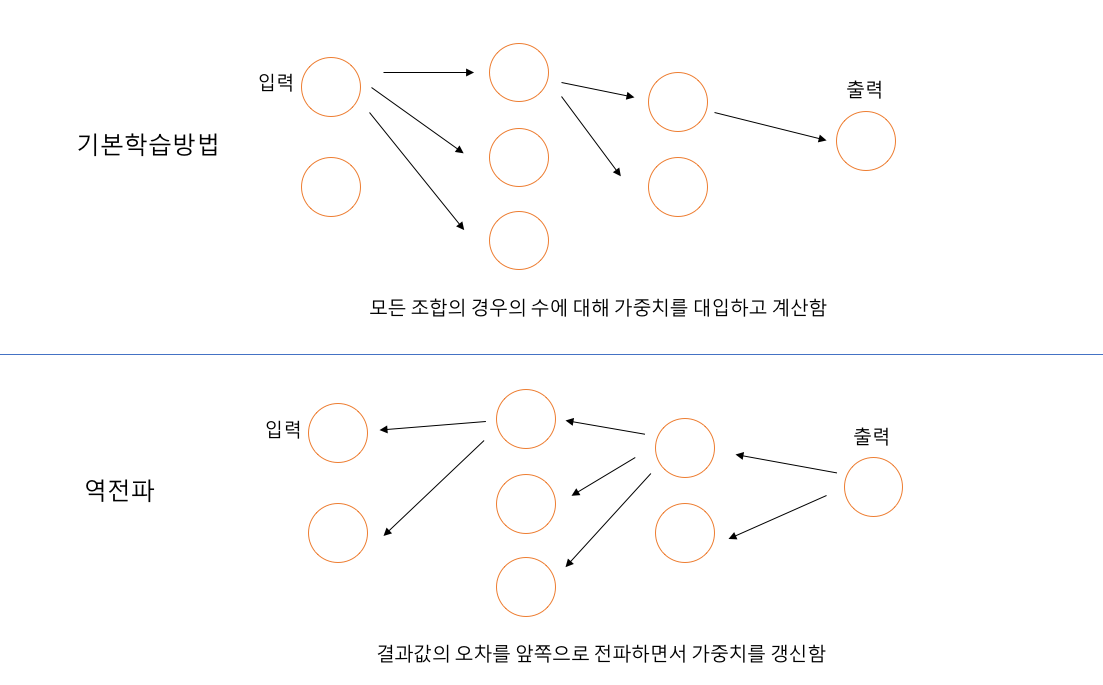

<br/>
<br/>

# 2) 간단한 분류 모델 구현하기

: 딥러닝을 가장 많이 활용하는 분야는 패턴 인식을 통한 영상처리이다.
 예를 들어, 어떤 사진이 고양이인지, 강아지인지 등 판단하는 데 쓰인데는 말이다.
 이처럼 패턴을 파악해 여러 종류로 구분하는 작업을 분류라고 한다.

 : 분류 인공신경망 예제로, 털과 날개가 있느냐를 기준으로 포유류와 조류를 구분하는 신경망 모델을 만들어보자.



In [ ]:
# [1] 텐서플로, Numpy 라이브러리 import하기

import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf_1
tf_1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#[2] 학습에 사용할 데이터 정의하기
# : 털과 날개의 유무를 담는 특정 데이터를 구성한다.(있으면 1, 없으면 0)

x_data = np.array(   #[털, 날개]
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]]
)

: 데이터를 정의 하고, 각 개체가 실제 어떤 종류인지를 나타내는 레이블(분류값) 데이터를 구성한다.

: 앞서 정의한 데이터의 객체가 포유류인지 조류인지, 아니면 제 3의 종류인지 기록한 실제 결과값이다.

: 레이블 데이터(분류값)는 원-핫 인코딩이라는 특수한 형태로 구성한다.

<br/>

### (1) 분류값, 원 핫 인코딩

- 원 핫 인코딩이란, 데이터가 가질 수 있는 값들을 일렬로 나열한 배열을 만들고 -> 그 중 표현하려는 값의 인덱스만 1로 표기하고 나머지는 0으로 표기하는 기법이다.

- 예를 들어, 우리가 판별하는 개체의 종류가 '기타, 포유류, 조류'가 있다고 하자.
```
개체의 종류를 배열로 넣으면 [기타, 포유류, 조류]가 된다.
그리고 각 종류의 인덱스는 기타는 0, 포유류는 1, 조류는 2가 된다.
이들을 원핫 인코딩으로 하면 아래와 같다.
기타 = [1, 0, 0]
포유류 = [0, 1, 0]
조류 = [0, 0, 1]
```

- 이제 개체들을 구분하는 y_data를 만들어보자



In [ ]:
#[3]  레이블 데이터를 원 핫 인코딩 형식으로 만들자
# [털, 날개] -> [기타, 포유류, 조류]

y_data = np.array(
    [
     [1,0,0],  # 기타
     [0,1,0],   # 포유류
     [0,0,1],   # 조류
     [1,0,0],
     [1,0,0],
     [0,0,1]
    ]
)

In [ ]:
# [4] 신경망 모델 구성하기(특징X와 레이블 Y와의 관계를 알아내는 모델)
# : X,Y에 실측값을 넣어서 학습시킬 것이니 x,y는 플레이스홀더로 설정한다.(범위내 가상값)
X = tf_1.placeholder(tf.float32)
Y = tf_1.placeholder(tf.float32)

: 가중치와 편향 변수를 설정한다.

: 신경망에서는 가중치와 편향의 값을 변경하며 X,Y의 연관관계를 학습한다.


In [ ]:
W = tf.Variable(tf.random.uniform([2,3], -1. , 1.))      #[입력층(특징수), 출력층(레이블수)]의 구성인 [2,3], 범위 [-1<W<1]
b = tf.Variable(tf.zeros([3]))    #편향변수b =  레이블 수인 3개의 요소를 가진 변수로 설정

: 이제 가중치를 곱하고 편향을 더한 결과를 -> 활성화 함수인 ReLu에 적용하자.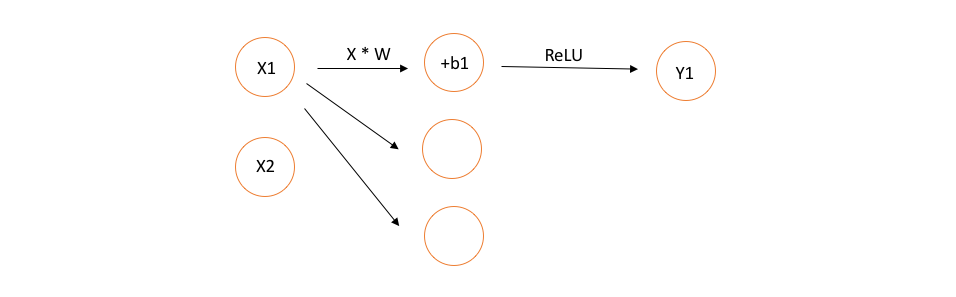

In [ ]:
L = tf.add(tf.matmul(X, W), b)
L = tf.nn.relu(L)

In [ ]:
#[5] 신경망을 통해 나온 출력값을 softmax함수를 이용하여 사용하기 쉽게 다듬자!
model = tf.nn.softmax(L)

### (2) softmax 함수

: softmax함수는 배열 내의 결과값들을 전체 합이 1이 되도록 만들어준다.

: 전체가 1이니 각각은 해당 결과의 확률로 해석할 수 있다.

```
[8,04, 2.76, -6.52]   -> [0.53, 0.24, 0.23]
```

<br/>

### (3) 이제 손실함수를 작성해보자

: 손실함수는 원 핫 인코딩을 이용한 모델에서 사용하는, 교차 엔트로피 함수를 사용하자.

: 교차 엔트로피 값은 '예측값과 실제값의 확률분포 차이'를 계산한 값이다.

: 교차 엔트로피의 기본 코드는 아래와 같다.

```
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))
```
<br/>

: 교차 엔트로피의 계산 과정은 아래와 같다.

: Y는 실측값, model은 신경망을 통해 나온 예측값이다.

```
    Y                model
[[1 0 0]    [0.1, 0.7, 0.2]
 [0 1 0]    [0.2, 0.8, 0.0]
]
```

<br/>

: 그런 다음, model값에 log를 취한 값을 Y와 곱한다.

```
    Y                model                      Y*tf.log(model)
[[1 0 0]    [0.1, 0.7, 0.2]       ->      [[-1.0  0  0]
 [0 1 0]    [0.2, 0.8, 0.0]                 [0  -0.09    0]]
]
```

<br/>

: 행별로 값을 다 더한다.

```
  Y*tf.log(model)              reduce_sum(axis=1)
[[-1.0  0  0]             ->     [-1.0     -0.09 ]
 [0  -0.09    0]]
```

<br/>

: 마지막으로, 배열 안 값의 평균을 내면 -> 이것이 바로 우리의 손실값인 교차 엔트로피 값이다.

: reduce_XXX는 텐서의 차원을 줄여준다.(axis를 사용해 축소할 차원을 정함)

```
 reduce_sum(axis=1)          reduce_mean
 [-1.0     -0.09 ]         ->   -0.545 
 ```

 <br/>

 ### (4) 최적화하기
: 최적화함수는, 가중치와 편향 값을 변경해주면서 -> 손실값을 최소화하는 가장 최적화된 가중치와 편향값을 찾아주는 함수이다.

: 최적화를 빠르게 하기 위해 여러가지 방법을 사용하는데 경사하강법이 제일 기본적인 알고리즘이다.

: 경사하강법은 함수의 기울기를 구하고 -> 기울기가 낮은 쪽으로 계속 이동하면서 -> 최적의 값을 찾아 나가는 것이다.

In [ ]:
# [6]  최적화 함수를 이용해 최적화하기
# 기본적인 경사하강법으로 최적화한다
cost = tf_1.reduce_mean(-tf.reduce_sum(Y * tf_1.log(model), axis=1))  
optimizer = tf_1.train.GradientDescentOptimizer(learning_rate=0.01)  #v1 - GradientDescentOptimizer
train_op = optimizer.minimize(cost)

#텐서플로의 세션 초기화
init = tf_1.global_variables_initializer()
sess = tf_1.Session()
sess.run(init)

#앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행
for step in range(100):
  sess.run(train_op, feed_dict={X : x_data, Y : y_data})

  #학습 도중 10번에 한번씩 손실값을 출력한다.
  if(step + 1) % 10 == 0:
    print(step + 1, sess.run(cost, feed_dict={X : x_data, Y : y_data}))

10 1.0011781
20 0.9977297
30 0.99445724
40 0.9911749
50 0.98795396
60 0.9848383
70 0.9817799
80 0.97877026
90 0.9758211
100 0.972966


In [ ]:
#학습된 결과를 확인하는 코드를 작성한다.
# 예측값인 model을 바로 출력하면 [0.2, 0.7, 0.1]과 같은 확률로 나오므로
# 요소 중 가장 큰 값의 인덱스를 찾아주는 argmax함수를 사용해 레이블을 출력한다.
prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis = 1)
print('예측값', sess.run(prediction, feed_dict={X : x_data}))
print('실제값', sess.run(target, feed_dict={Y : y_data}))

예측값 [0 2 2 0 0 2]
실제값 [0 1 2 0 0 2]


In [ ]:
#전체 학습 데이터에 대한 예측값과 실측값을 tf.equal함수로 비교한 뒤 true, false값으로 나온 결과를
# tf.cast함수를 사용해 0과 1로 바꾸어 평균을 내면 정확도를 구할 수 있다.
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %2f' %sess.run(accuracy*100, feed_dict={X : x_data, Y : y_data}))

정확도: 83.333328


: 정확도의 경우, 학습횟수를 늘리는 대신 신경망 층을 더 늘리면 높아진다.

<br/>
<br/>

## 3) 심층 신경망 구현하기

- 신경망의 층을 두개 이상으로 구성된 심층 신경망을 구현해보자!

<br/>

### (1) 가중치, 편향 추가하기
- 앞서 만든 신경망 모델에 가중치와 편향을 추가해준다.
- 입력층과 출력층은 각각 특징과 분류 개수로 맞추고, 중간의 연결 부분은 맞닿은 뉴런 수와 같게 한다.
- 중간의 연결 부분을 은닉층이라하며, 은닉층의 뉴런 수는 하이퍼파라미터이므로 실험을 통해 적절한 수를 정하면 된다.




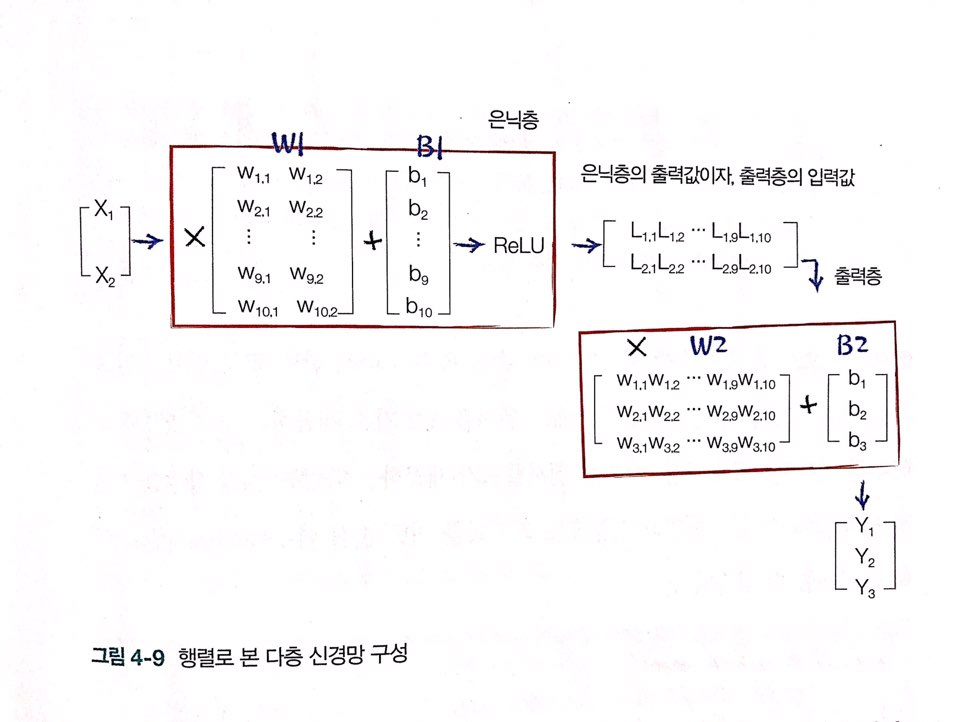

```
W1 [2, 10] -> [특징,   은닉층뉴런수]
W2 [10,3] -> [은닉층뉴런수, 분류수]

b1 [10] -> [은닉층뉴런수]
b2 [3] -> [분류수]   
```

In [ ]:
W1 = tf.Variable(tf.random.uniform([2, 10], -1. , 1.))     #[2, 10] -> [특징,   은닉층뉴런수]
W2 = tf.Variable(tf.random.uniform([10 ,3], -1. , 1.))     #[10,3] -> [은닉층뉴런수, 분류수]

b1 = tf.Variable(tf.zeros([10]))        #[10] -> [은닉층뉴런수]
b2 = tf.Variable(tf.zeros([3]))         #[3] -> [분류수]   

<br/>

### (2) 특징 입력값에 첫번째 가중치와 편향, 활성화 함수 적용하기

In [ ]:
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

<br/>

### (3) 출력층 만들기
- 출력층을 만들기 위해, 두번째 가중치와 편향을 적용하여 최종 모델을 만든다.
- 은닉층에 두 번째 가중치 W2[10,3]와 편향b2[3]을 적용하면 최종적으로 3개의 출력값을 가진다.

In [ ]:
model = tf.add(tf.matmul(L1, W2), b2)

<br/>

### (4) 손실 함수 작성하기


In [ ]:
cost = tf_1.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=model))  
optimizer = tf_1.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

<br/>

전체코드

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf_1
tf_1.disable_v2_behavior()

x_data = np.array(   #[털, 날개]
    [[0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [0, 1]]
)

y_data = np.array(
    [
     [1,0,0],  # 기타
     [0,1,0],   # 포유류
     [0,0,1],   # 조류
     [1,0,0],
     [1,0,0],
     [0,0,1]
    ]
)

X = tf_1.placeholder(tf.float32)
Y = tf_1.placeholder(tf.float32)

W1 = tf.Variable(tf.random.uniform([2, 10], -1. , 1.))     #[2, 10] -> [특징,   은닉층뉴런수]
W2 = tf.Variable(tf.random.uniform([10 ,3], -1. , 1.))     #[10,3] -> [은닉층뉴런수, 분류수]

b1 = tf.Variable(tf.zeros([10]))        #[10] -> [은닉층뉴런수]
b2 = tf.Variable(tf.zeros([3]))         #[3] -> [분류수]   

L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

model = tf.add(tf.matmul(L1, W2), b2)

cost = tf_1.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))  
optimizer = tf_1.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

#텐서플로의 세션 초기화
init = tf_1.global_variables_initializer()
sess = tf_1.Session()
sess.run(init)

#앞서 구성한 특징과 레이블 데이터를 이용해 학습을 100번 진행
for step in range(100):
  sess.run(train_op, feed_dict={X : x_data, Y : y_data})

  #학습 도중 10번에 한번씩 손실값을 출력한다.
  if(step + 1) % 10 == 0:
    print(step + 1, sess.run(cost, feed_dict={X : x_data, Y : y_data}))

prediction = tf.argmax(model, axis=1)
target = tf.argmax(Y, axis = 1)
print('예측값', sess.run(prediction, feed_dict={X : x_data}))
print('실제값', sess.run(target, feed_dict={Y : y_data}))

#전체 학습 데이터에 대한 예측값과 실측값을 tf.equal함수로 비교한 뒤 true, false값으로 나온 결과를
# tf.cast함수를 사용해 0과 1로 바꾸어 평균을 내면 정확도를 구할 수 있다.
is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %2f' %sess.run(accuracy*100, feed_dict={X : x_data, Y : y_data}))

10 0.87100047
20 0.6620829
30 0.47530174
40 0.33524403
50 0.23367469
60 0.16289102
70 0.113807976
80 0.08118119
90 0.059500616
100 0.045043707
예측값 [0 1 2 0 0 2]
실제값 [0 1 2 0 0 2]
정확도: 100.000000
